In [1]:
#Importing all the libraries that we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing our dataset.
df = pd.read_csv('heart.csv')

In [3]:
#checking first five rows by calling df.head()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#take a look at the colmun names.
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

# Columns description 

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [6]:
#checking for null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#concise summary of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Let's get a `quick overview` of the full dataset.

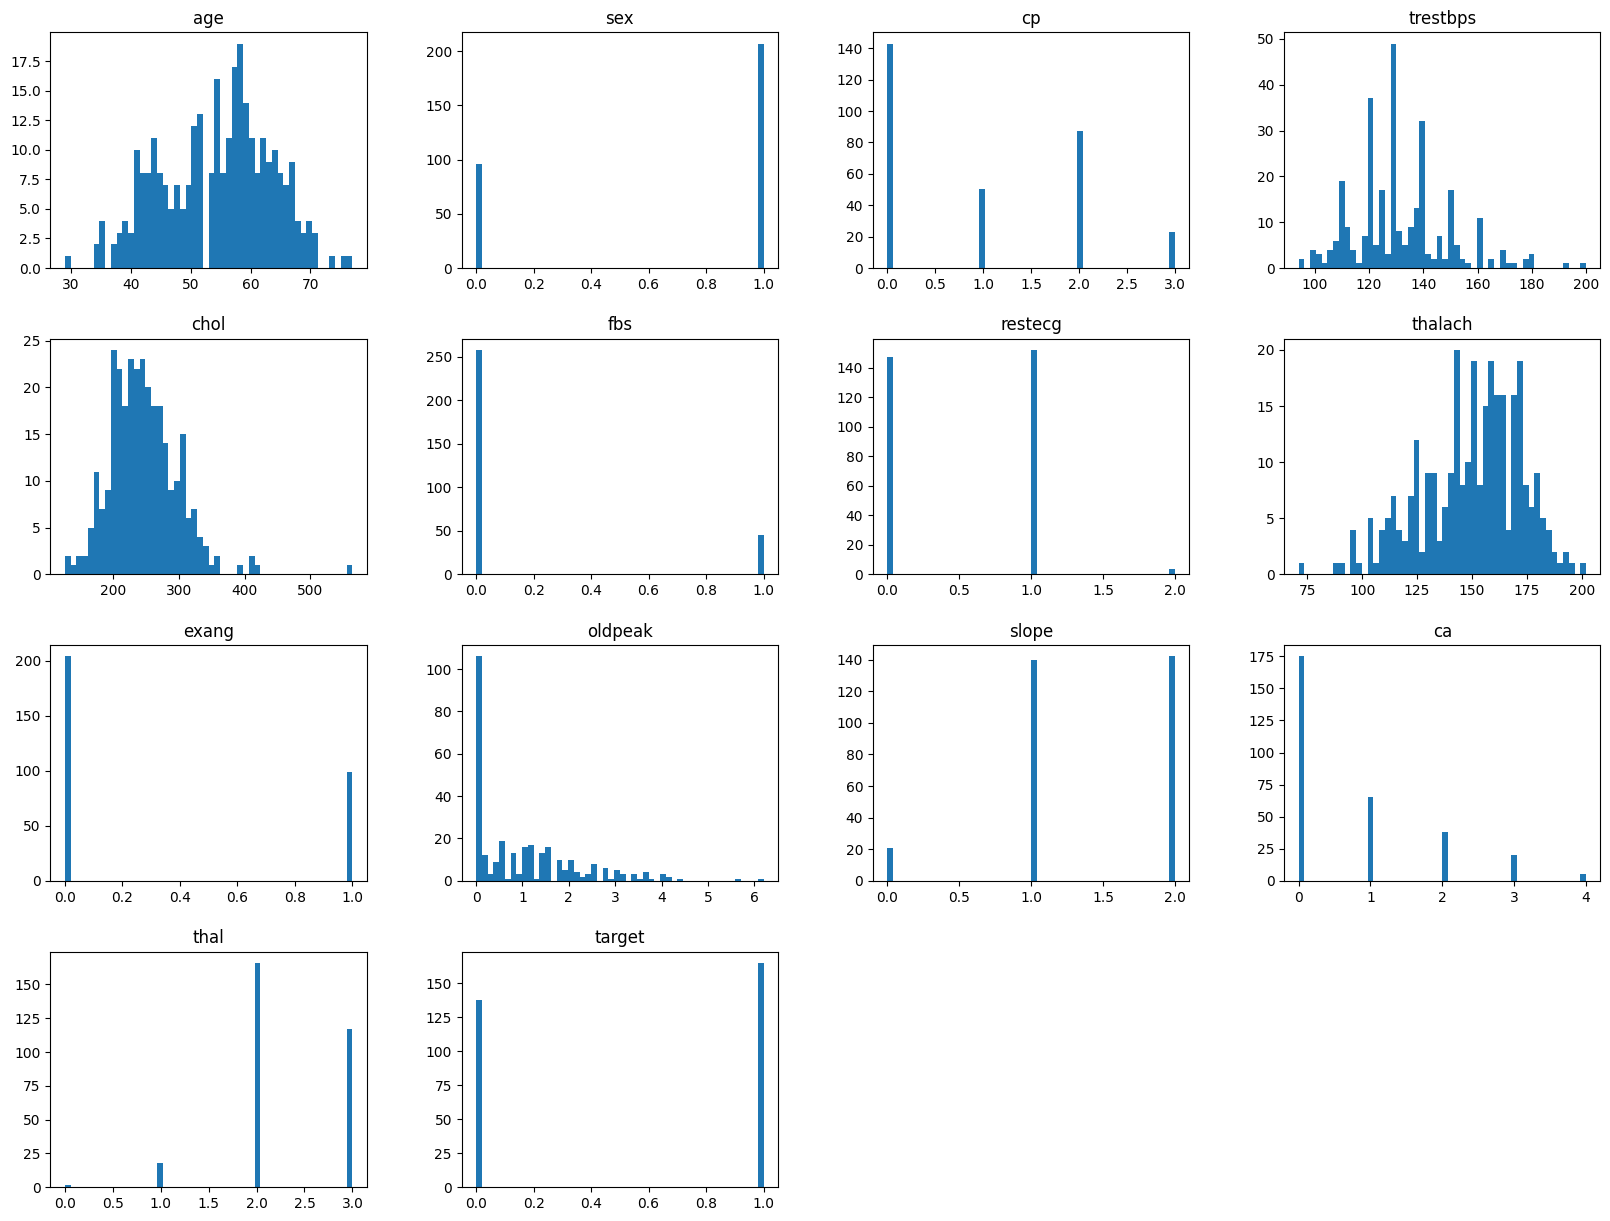

In [8]:
#plotting histogram of all numeric values
df.hist(bins = 50, grid = False, figsize=(20,15));

In [9]:
#Generating descriptive statistics.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data analysis is about answering questions. Let's define some question as a list.

In [10]:
questions = ["1. How many people have heart disease and how many people doesn't have heart disease? ", 
             "2. People of which sex has most heart disease?",
             "3. People of which sex has which type of chest pain most?",
             "4. People with which chest pain are most pron to have heart disease?",
             "5. Age vs Maximum heart rate when people have heart disease.",
             "6. Age vs Maximum heart rate when people doesn't have heart disease.",
             "7. Age vs serum cholestoral when people have heart disease.",
             "8 Age vs serum cholestoral when people doesn't have heart disease.",
             "9. People of which sex has more exercise induced angina?",
             "10. Which sex of people has more fasting blood sugar > 120 mg/dl?"
            ]

In [11]:
questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?',
 '5. Age vs Maximum heart rate when people have heart disease.',
 "6. Age vs Maximum heart rate when people doesn't have heart disease.",
 '7. Age vs serum cholestoral when people have heart disease.',
 "8 Age vs serum cholestoral when people doesn't have heart disease.",
 '9. People of which sex has more exercise induced angina?',
 '10. Which sex of people has more fasting blood sugar > 120 mg/dl?']

**Let's find the answer of first question.**

## 1. How many people have heart disease and how many people doesn't have heart disease?`

In [12]:
#getting the values
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

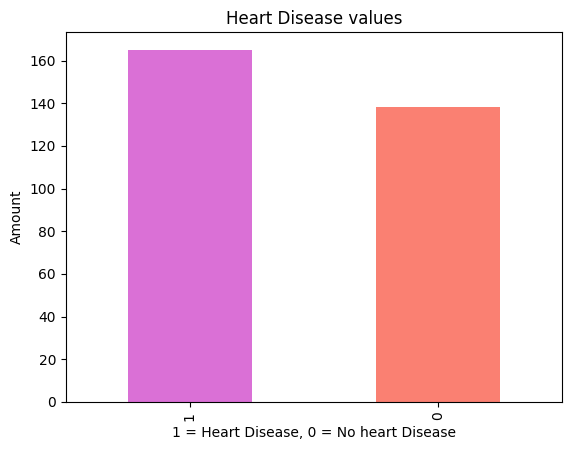

In [13]:
#plotting bar chart.
df.target.value_counts().plot(kind = 'bar', color=["orchid", "salmon"])
plt.title("Heart Disease values")
plt.xlabel("1 = Heart Disease, 0 = No heart Disease")
plt.ylabel("Amount");

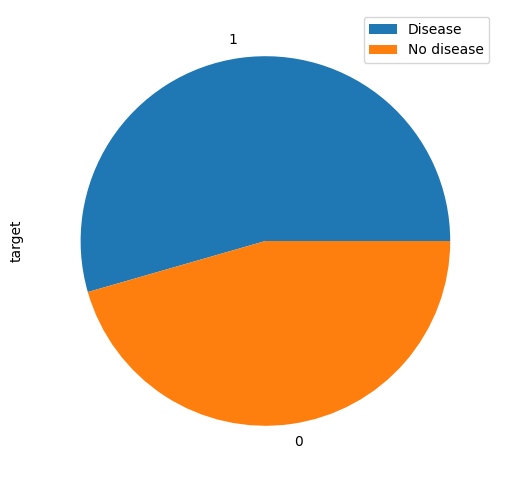

In [14]:
#plotting a pie chart
df.target.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(["Disease", "No disease"]);

`0` represent `Female`

`1` represent `Male`

`0` represent `No disease`

`1` represent `Disease`

Now let's check how many `Male` and `Female` are in the dataset

In [15]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

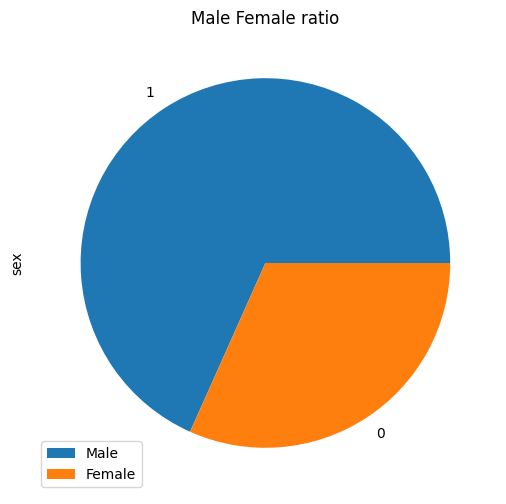

In [16]:
#plotting a pie chart
df.sex.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.title('Male Female ratio')
plt.legend(['Male', 'Female']);

Let's find the answer of our 2nd question.

## 2. People of which sex has most heart disease?`

In [17]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


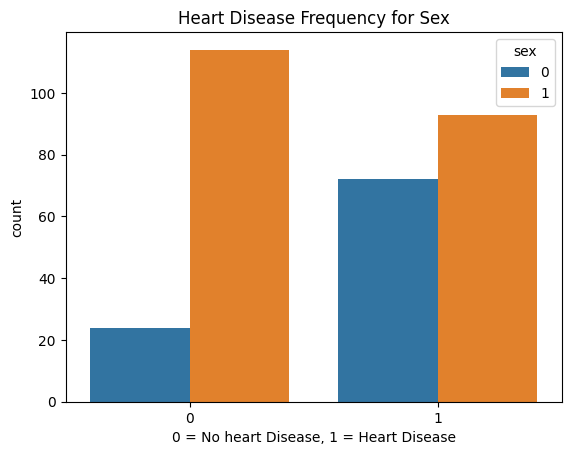

In [18]:
sns.countplot(x = 'target', data = df, hue = 'sex')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No heart Disease, 1 = Heart Disease");

Number of male is more than double in our dataset than female.

More than `45% male` has heart disease and `75% female` has heart disease.

Let's move to question 3

## 3. People of which sex has which type of chest pain most?`

In [19]:
#counting values for different chest pain
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Visit this website for more color: https://matplotlib.org/stable/gallery/color/named_colors.html

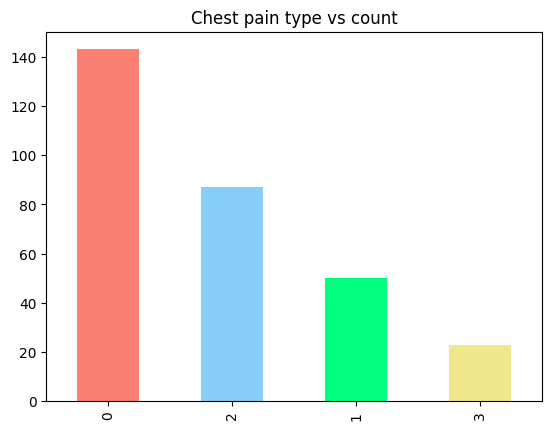

In [20]:
#plotting a bar chart
df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title('Chest pain type vs count');

Let's see people of which sex has which type of chest pain as a dataframe and then plot them as a bar chart.

In [21]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


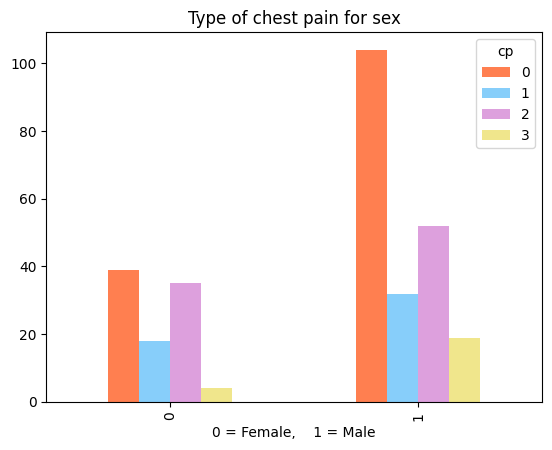

In [22]:
pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
plt.xlabel('0 = Female,    1 = Male');

Most of `male` has `type 0` chest pain and least of `Male` has `type 4` pain.

in case of `Female` `type 0` and `type 1` percentage is almost same.

Now question 4!

## 4. People with which chest pain are most pron to have heart disease?`

In [23]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


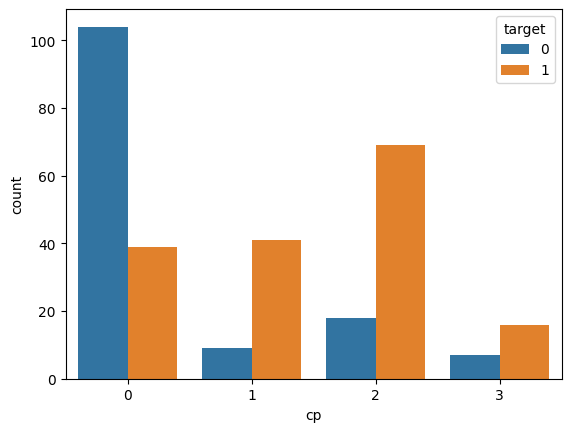

In [24]:
sns.countplot(x = 'cp', data = df, hue = 'target');

Most of people who has `type 0` chest pain has less chance of heart disease.

And we see the opposite for other types.

Now let's take look at our age column.

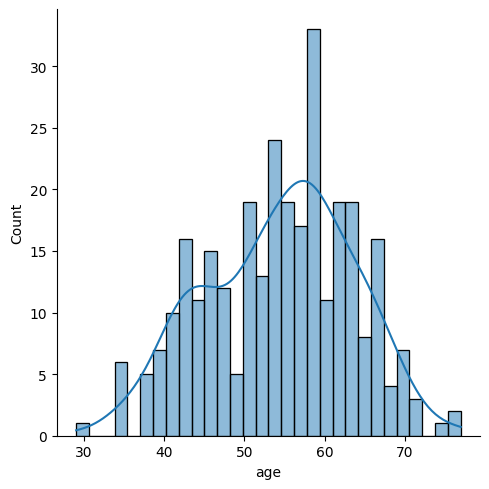

In [25]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = df, bins = 30, kde = True);

`58-59` year old people are most in the dataset.

Let's plot another distribution plot for `Maximum heart rate`

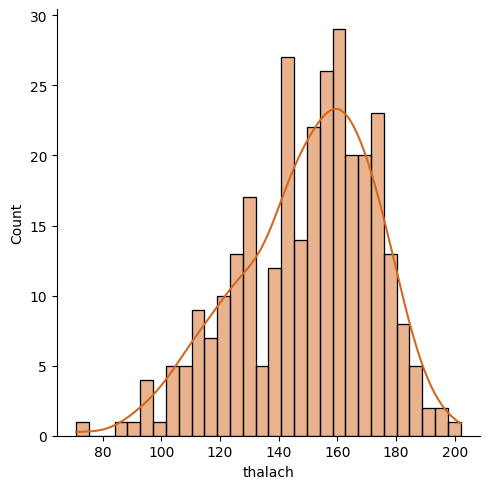

In [26]:
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate');

From this plot we get a clear overview about Maximum heart rate represented by `thalach`

Now let's solve question 5 and 6 together.

## 5. Age vs Maximum heart rate when people have heart disease.`

## 6. Age vs Maximum heart rate when people doesn't have heart disease.`

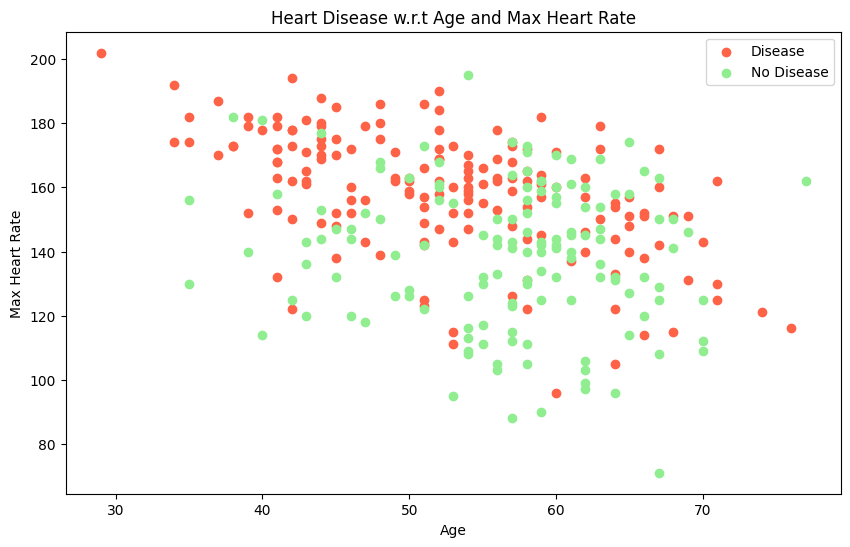

In [27]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="tomato") # color

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightgreen") # color

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

Distribution plot for `number of people with heart disease` vs `max heart rate`

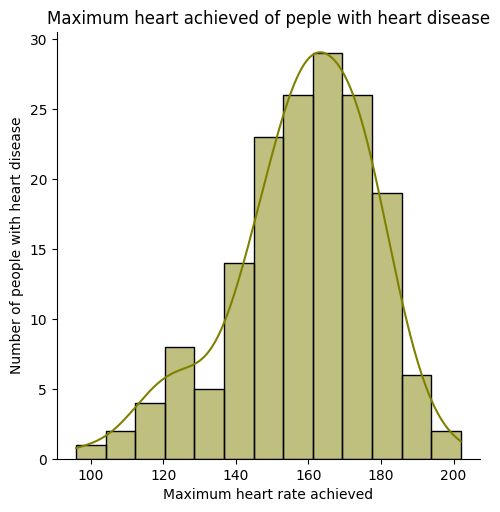

In [29]:
sns.displot(x = df.thalach[df.target==1], data = df, kde = True, color= 'olive')
plt.title("Maximum heart achieved of peple with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

Distribution plot for `number of people without heart disease` vs `max heart rate`

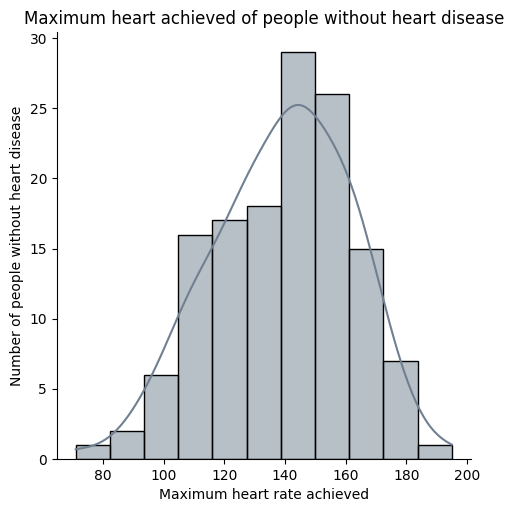

In [30]:
sns.displot(x = df.thalach[df.target==0], data = df, kde = True, color= 'slategray')
plt.title("Maximum heart achieved of people without heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people without heart disease");

Let's first make a distribution plot for serum cholestoral

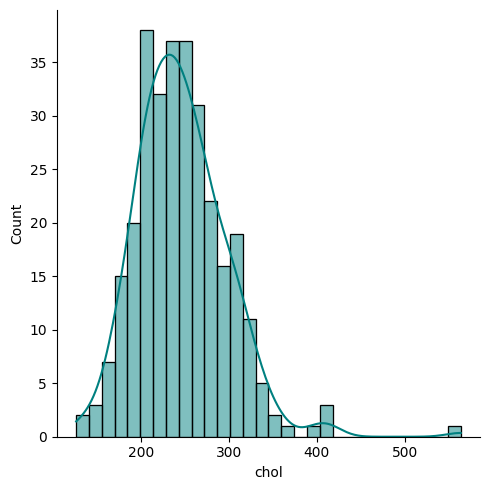

In [31]:
sns.displot(x = 'chol', data = df, bins = 30, kde = True, color = 'teal');

Now let's plot another scatter plot for Age vs serum cholestoral

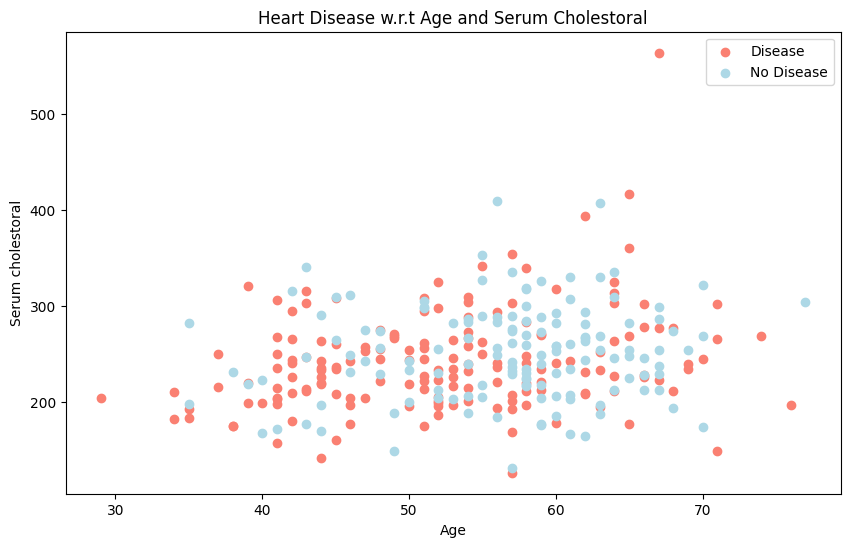

In [32]:
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Serum Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Serum cholestoral");

## 7 Distribution plot for `number of people with heart disease` vs `Serum Cholestoral`

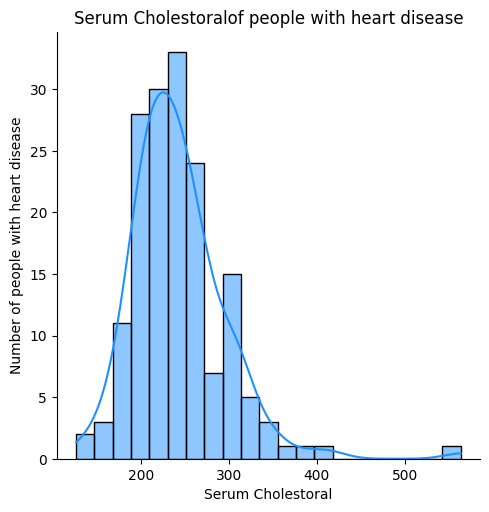

In [33]:
sns.displot(x = df.chol[df.target==1], data = df, kde = True, color= 'dodgerblue')
plt.title("Serum Cholestoralof people with heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people with heart disease");

## 8. Distribution plot for `number of people without heart disease` vs `Serum Cholestoral`

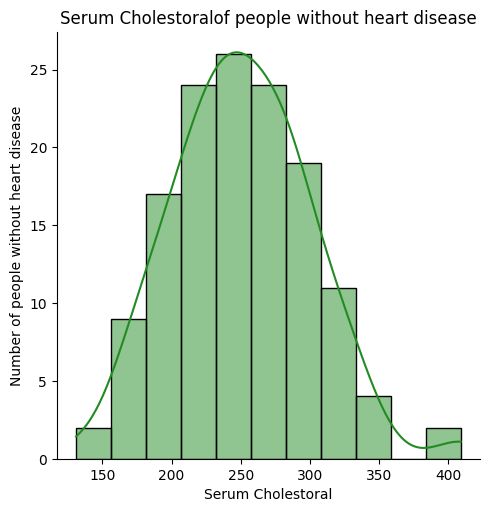

In [34]:
sns.displot(x = df.chol[df.target==0], data = df, kde = True, color= 'forestgreen')
plt.title("Serum Cholestoralof people without heart disease")
plt.xlabel("Serum Cholestoral")
plt.ylabel("Number of people without heart disease");

Question no: 9

## 9. People of which sex has more exercise induced angina?`

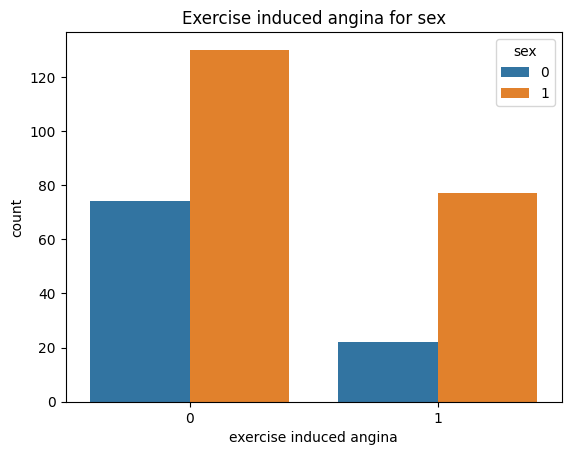

In [35]:
sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title('Exercise induced angina for sex')
plt.xlabel('exercise induced angina');

So it is clear that `Male` has `exercise induced angina` more than `Female`

Question 10

## 10.Which sex of people has more fasting blood sugar > 120 mg/dl?`

In [36]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

`1` represent `fbs>120 mg/dl`

`0` represent `fbs<120 mg/dl`

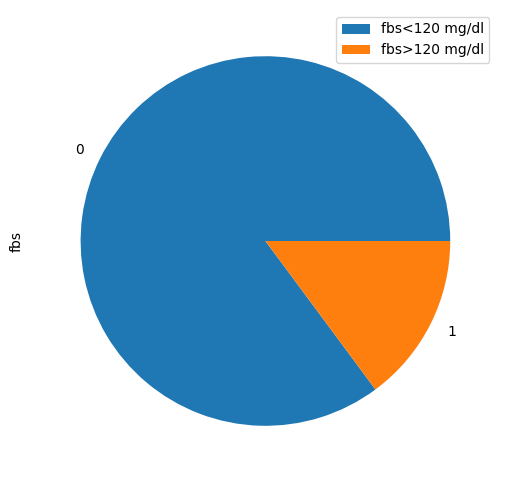

In [37]:
df.fbs.value_counts().plot(kind = 'pie', figsize = (8, 6))
plt.legend(['fbs<120 mg/dl', 'fbs>120 mg/dl']);

In [38]:
pd.crosstab(df.sex, df.fbs)

fbs,0,1
sex,,
0,84,12
1,174,33


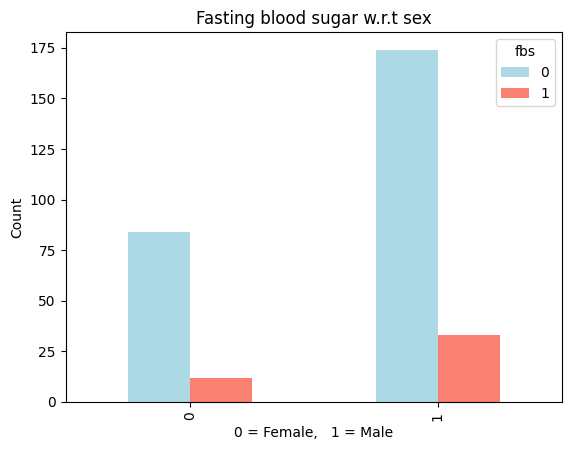

In [39]:
pd.crosstab(df.sex, df.fbs).plot(kind = 'bar', color = ['lightblue', 'salmon'])
plt.title("Fasting blood sugar w.r.t sex")
plt.xlabel("0 = Female,   1 = Male")
plt.ylabel("Count");

`Male` has more fbs > 120 ml/dl than `Female`